In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import queue as q

In [2]:
def CreateGraph():
    G = nx.Graph()
    source = "Karen"
    destination = "ImaraDaima"
    edges = nx.read_edgelist('./input.txt',
    data=(('weight',float),), create_using=nx.DiGraph())
    nodes = nx.read_adjlist("nodes.txt")
    G.add_edges_from(edges.edges())
    G.add_nodes_from(nodes)
    heuristics = {}
    f = open('heuristics.txt')
    for i in G.nodes():
        node_heuristic_val = f.readline().split()
        heuristics[node_heuristic_val[0]] = node_heuristic_val[1]
    return G, source, destination, heuristics  

In [3]:
def DrawMap(G,source,dest):
    pos = nx.spring_layout(G)
    val_map = {}
    val_map[source] = 'green'
    val_map[dest] = 'red'
    values = [val_map.get(node, 'blue') for node in G.nodes()]
    nx.draw(G, pos, with_labels = True, node_color = values, edge_color = 'b' ,width = 1, alpha = 0.7) 
    edge_labels = dict([((u, v,), d['weight']) for u, v, d in G.edges(data = True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels, label_pos = 0.5, font_size = 11)
    return pos    

In [11]:
def getPriorityQueue(list):
	q = Q.PriorityQueue()
	for node in list:
		q.put(Ordered_Node(heuristics[node],node))
	return q,len(list)

def greedyBFSUtil(G, v, visited, final_path, dest, goal):
    if goal == 1:
        return goal
    visited[v] = True
    final_path.append(v)
    if v == dest:
        goal = 1
    else:
        pq_list = []
        pq,size = getPriorityQueue(G[v])
        for i in range(size):
            pq_list.append(pq.get().description)
        for i in pq_list:
            if goal != 1:
                if visited[i] == False :
                    goal = greedyBFSUtil(G, i, visited, final_path, dest, goal)
    return goal                
 
def greedyBFS(G, source, dest, heuristics, pos):
    visited = {}
    for node in G.nodes():
    #print(node)
        visited[node] = False
    final_path = []
    goal = greedyBFSUtil(G, source, visited, final_path, dest, 0)
    prev = -1
    for var in final_path:
        if prev != -1:
            curr = var
            nx.draw_networkx_edges(G, pos, edgelist = [(prev,curr)], width = 3.0, alpha = 1.0, edge_color = 'black')
            prev = curr
        else:
            prev = var
    return

class Ordered_Node(object):
	def __init__(self, priority, description):
		self.priority = priority
		self.description = description
		return
	def __cmp__(self, other):
		return cmp(self.priority, other.priority)
    

C:\Users\Richard Mbingi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Richard Mbingi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


KeyError: 'weight'

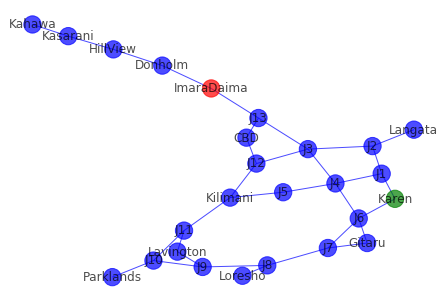

In [23]:
G, source,dest,heuristics = CreateGraph()
pos = DrawMap(G, source, dest)
greedyBFS(G, source, dest, heuristics, pos)
plt.show()